# <font color= 'blue'> Machine Learning
# <font color='blue'> Homework 2 </font>

## <font color= 'blue'> Linear Basis & Radial Basis Expansion Models
Mehek Niwas || MTH 4224 Spring 2024

# <font color='blue'> Imports </font>

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

# imports for image handling
from PIL import Image
from IPython import display

# general imports for metrics/model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale

# imports for problem 1
from scipy.interpolate import CubicSpline
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.pipeline import make_pipeline

# additional imports for problem 2
from mpl_toolkits.mplot3d import Axes3D

from scipy.interpolate import Rbf # syntax is Rbf not RBF
from sklearn.preprocessing import PolynomialFeatures
import mpl_toolkits.mplot3d.axes3d as axes3d

from sklearn.svm import SVR
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import StandardScaler

# <font color='blue'> Problem 1: Linear Basis Expansion Model </font>


*A common type of linear basis expansion is cubic splines. (See pages 141-146 in Elements of Statistical Learning.) Parts of this problem use the Italian Air Quality Dataset, which has hourly data from 3/10/2004 to 4/4/2005 on numerous measures of air pollution.*



## <font color='blue'> Part A </font>
*Complete Elements of Statistical Learning Exercise 5.1*

Exercise 5.1: Show that the truncated power basis functions in (5.3) represent a basis for a cubic spline with the two knots as indicated.

In [ ]:
# make image smaller/bigger
base_width = 600
img = Image.open('page_1.jpg')
wpercent = (base_width / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((base_width, hsize), Image.Resampling.LANCZOS)
img.save('page_1.jpg')

base_width = 600
img = Image.open('page_2.jpg')
wpercent = (base_width / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((base_width, hsize), Image.Resampling.LANCZOS)
img.save('page_2.jpg')

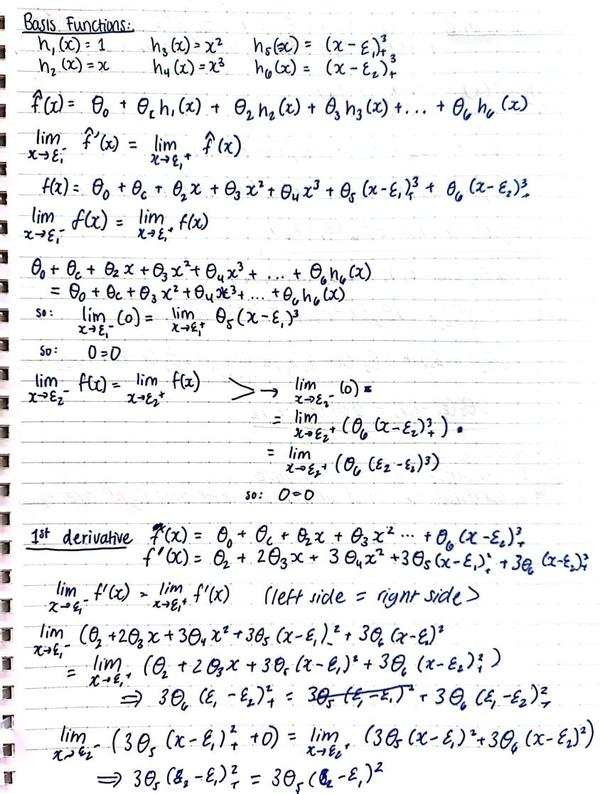

In [ ]:
img_path = "/content/page_1.jpg"
display.Image(img_path)

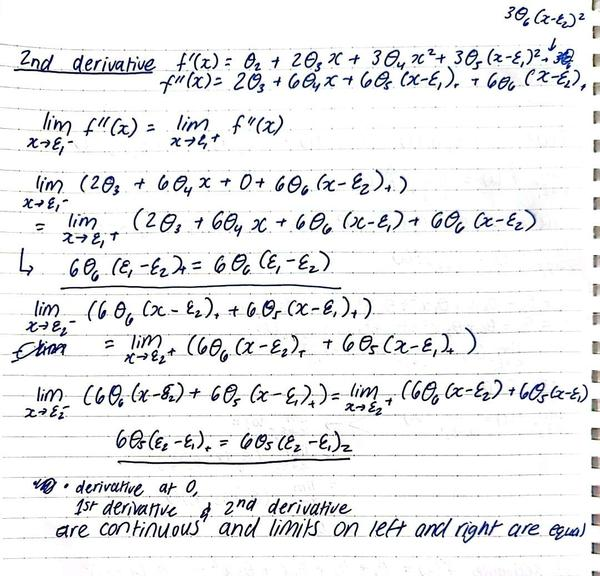

In [ ]:
img_path = "/content/page_2.jpg"
display.Image(img_path)

## <font color='blue'> Part B </font>
*Load the Italian Air Quality Dataset into Python. Remove any columns with more than 10% missing data (-200 = missing). Convert it into a dataset of non-overlapping time-series corresponding to 24 hours of readings.*

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
X = air_quality.data.features # no assigned targets

# metadata
print(air_quality.metadata)
print("Missing values are tagged with -200 value per documentation")

# variables
dataset_variables = pd.DataFrame(air_quality.variables) # convert ucimlrepo variables to dataframe
selected_columns = ['name', 'role', 'type'] # list of columns to view
print(dataset_variables[selected_columns])

{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 'S. D. Vito, E. Massera, M. P

In [ ]:
X
data = X

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [ ]:
data['Time'] = data['Time'].str.replace(':00:00','')

# remove NaN rows
nan_rows = data[pandas.isna(data['Time'])].index
data = data.drop(index=nan_rows)

# remove features that are populated with less than 200 elements missing
drop_columns = []

for column in data:
  na_count = 0
  for element in data[column]:
    if na_count >= 200:
      drop_columns.append(column)
      break
    if pandas.isna(element):
      na_count += 1

data = data.drop(columns=drop_columns)

# sort by time / data
data = data.sort_values(by=['Date', 'Time'], ascending=[False, True])
# set to float
data['Time'] = data['Time'].astype(float)
dates = set(data['Date'])
dates = sorted(dates)
data_arr = []
for date in dates:
  data_arr.append(data[data['Date'] == date])

# input ---> selected hrs (4)
X = []
# output --> other hrs (20)
y = []
# input + output --> (24)
all_readings = []
# selected hrs time stamps
time_stamps = np.array([20, 21, 22, 23])

for day in data_arr:
  X.append([])
  y.append([])
  all_readings.append([])

  # time stamps needed for input array
  for time in day['Time']:
    all_readings[-1].append(np.array(day[day['Time'] == time]['PT08.S1(CO)'], dtype=float)[0])
    if time in time_stamps:
      for reading in np.array(day[day['Time'] == time]):
        X[-1].append(np.array(day[day['Time'] == time]['PT08.S1(CO)'], dtype=float)[0])

    else:
      # rest of time stamps for output array
        y[-1].append(np.array(day[day['Time'] == time]['PT08.S1(CO)'], dtype=float)[0])

# delete empty row
for i in range(len(X)):
  if i > len(X) or i < 0 or i > len(y):
    break

  if len((np.array(X[i])) != len(time_stamps)) or (len(np.array(y[i])) != 24 - len(time_stamps)):
    X.pop(i)
    y.pop(i)

## <font color='blue'> Part C </font>
*Suppose there's a new sensor that makes the same readings but can only make readings 4 times per day. The new sensor is much cheaper, so we are interested in whether we can use the new sensors and use a cubic spline model to fill in the readings for PT08.S1 (CO) in the remaining hours using cubic splines with 4 time_stamps placed at whatever daily times you choose.*

Example of a prediction: 



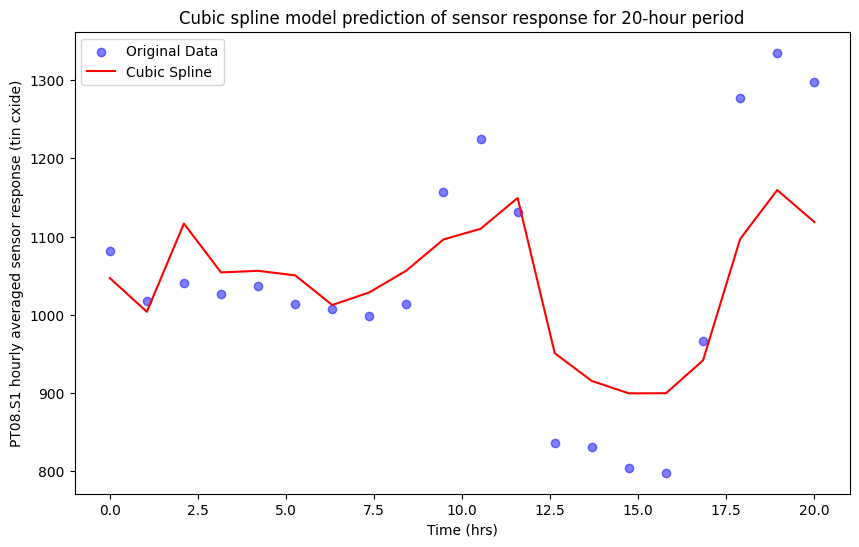

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, shuffle=True, random_state = 42)

# pipeline for spline transformer and linear regression!
model = make_pipeline(SplineTransformer(degree=3, n_knots=4), Ridge())
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)

# ranges for graph
input_range = np.array([20, 21, 22, 23])
output_range = np.linspace(0, 20, 20)

# graphing!
print("Example of a prediction: ")
print()
plt.figure(figsize=(10, 6))
plt.scatter(output_range, y_test[0], alpha=0.5, label='Original Data', color = 'blue')
plt.plot(output_range, y_predictions[0], label='Cubic Spline', color='red')
plt.legend()
plt.xlabel('Time (hrs)')
plt.ylabel('PT08.S1 hourly averaged sensor response (tin cxide)')
plt.title('Cubic spline model prediction of sensor response for 20-hour period') # example
plt.show()

# <font color='blue'> Problem 2: Radial Basis Expansion Model </font>


*The file ```data/aneurysm.npy```contains coordinates for a sparse point cloud of points on the boundy of the geometry of a blood vessel with an aneurysm. For this problem, you will analyze the data and attempt to build a model of the 2D boundary of the shape.*


## <font color='blue'> Part A </font>
*Read the data into Python and make a plot of the 3D points.*

In [ ]:
# read data
aneurysm_file_location = '/content/aneurysm.npy'
aneurysm = np.load(aneurysm_file_location)
print("Raw Aneurysm Data")
print(aneurysm)
print()

# get coordinates
X = np.array([aneurysm[0][i] for i in range(len(aneurysm[0]))])
y = np.array([aneurysm[1][i] for i in range(len(aneurysm[0]))])
Z = np.array([aneurysm[2][i] for i in range(len(aneurysm[0]))])

Raw Aneurysm Data
[[-9.12895e-03 -9.12895e-03 -9.12895e-03 ...  5.63950e-04 -7.54141e-03
  -8.53997e-03]
 [-4.99267e-04 -4.96340e-04 -4.83251e-04 ... -2.76780e-04 -4.74289e-05
   6.09793e-05]
 [-5.41389e-05  1.07960e-04 -2.54116e-04 ...  8.20211e-04 -9.95218e-04
  -9.96361e-04]]



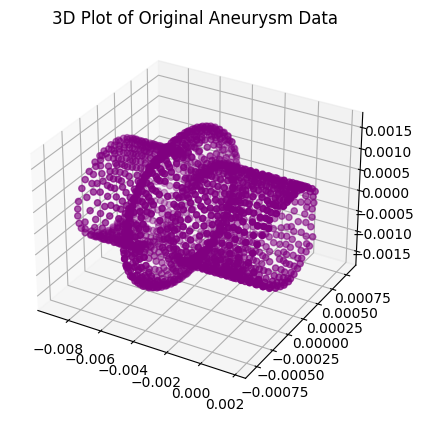

In [ ]:
# graph
plot = plt.figure()
ax = plot.add_subplot(111, projection='3d')
ax.scatter(X, y, Z, c='purple', marker='o')
plt.title("3D Plot of Original Aneurysm Data")
plt.show()

## <font color='blue'> Part B </font>
*Assume the geometry is made up of a 2D curve rotated about a suitable axis to create a shape that is circular on each slice perpendicular to the tube. Fit the best curve you can and plot the corresponding 3D surface.*

In [ ]:
# making flattened view
def make_flat(X, y, Z, max_err=0.0001):
  flat = [[], []]
  for index in range(len(aneurysm[0])):
    x_value = aneurysm[0][index]
    y_value = aneurysm[1][index]
    z_value = aneurysm[2][index]

    if abs(z_value) - 0 < max_err and y_value > 0:
      flat[0].append(x_value)
      flat[1].append(y_value)

  flat = [[flat[0][i], flat[1][i]] for i in range(len(flat[0]))]
  flat.sort(key=lambda x: x[0])
  flat = [[x[0] for x in flat], [y[1] for y in flat]]

  return np.array(flat)

# rotation of 2d graph to create 3d --> CALCULUS :0
def revolve_and_graph(X, Y, title_str):
  # linspace + gridding
  theta = np.linspace(0, 2*np.pi, 100)
  X_three_d, Theta = np.meshgrid(X, theta)

  # calc Y and Z for solid of revolution
  Y_three_d = np.cos(Theta) * Y # vector component
  Z_three_d = np.sin(Theta) * Y # vector component

  # graphing!!
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X_three_d, Y_three_d, Z_three_d, color='purple', alpha=0.6)

  plt.title(title_str)
  plt.show()

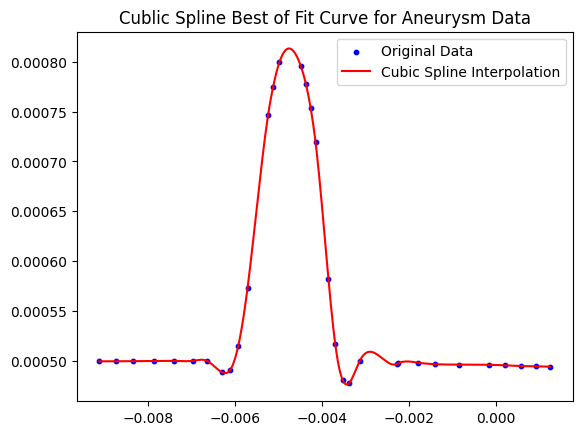

In [ ]:
new_X, new_Y = make_flat(X, y, Z)
X = np.array([element for element in new_X])
Y = new_Y

# plot the original points
plt.scatter(X, Y, s=10, color='blue', label='Original Data')

# fit a spline to the data
spline = CubicSpline(X, Y)
X_spline = np.linspace(min(X), max(X), 1000)

Y_spline = spline(X_spline)
plt.plot(X_spline, Y_spline, label='Cubic Spline Interpolation', color='red')
plt.title("Cublic Spline Best of Fit Curve for Aneurysm Data")
plt.legend()
print()
print()

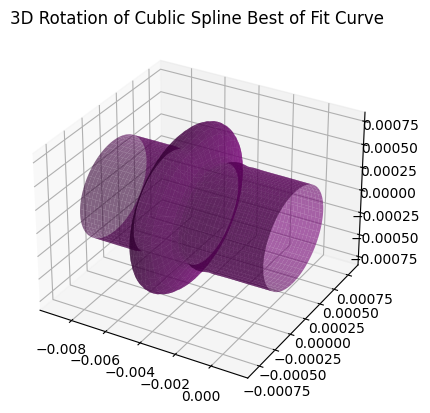

In [ ]:
# revolve around axis
revolve_and_graph(X_spline, Y_spline, "3D Rotation of Cublic Spline Best of Fit Curve") # syntax: (x, y, title_str)

## <font color='blue'> Part C </font>
*Fit a radial basis function expansion model to learn the surface using gradient descent for optimization. Plot the surface.*

In [ ]:
X = np.array([[element] for element in new_X])
y = new_Y

# make rbf
kernel = RBF(length_scale=0.001, length_scale_bounds=(1e-3, 1e3))

# make model w/ spline
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
model.fit(X, y)

# model predict
xModel = np.linspace(min(X), max(X), 100000)
yModel = model.predict(xModel)
predictions = model.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Mean absolute error: 7.617233293305428e-06



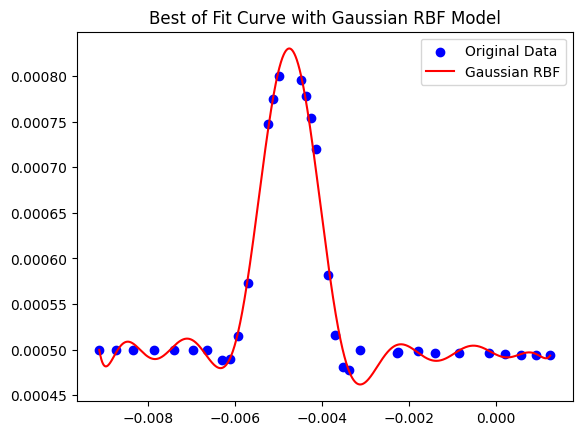

In [ ]:
# compute error
trainError = mean_absolute_error(Y, predictions)
print('Mean absolute error:', trainError)
print()

# graph!!
plt.scatter(X, Y, label='Original Data', color = "blue")
plt.plot(xModel, yModel, label='Gaussian RBF', color='red')
plt.legend()
plt.title("Best of Fit Curve with Gaussian RBF Model")
plt.show()

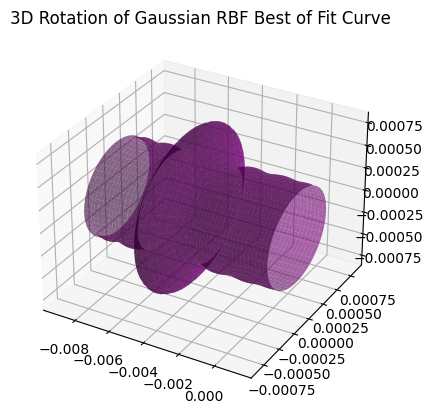

In [ ]:
# revolve around axis
revolve_and_graph(xModel, yModel, "3D Rotation of Gaussian RBF Best of Fit Curve")